# PortiaPy

Um pacote para trabalhar com a API Portia da Agriness Edge. Possui ferramentas para trabalhar com os dois principais grupos de _endpoints_ que a API oferece:

### Estruturas do Pipeline
- Fases (Phases);
- Axiomas (Axioms);
- Especificações (Specifications);

### Consultas
- Descrição (Describe);
- Perfil (Profile);
- Seleção (Select);
- Sumário (Summary);

In [1]:
import portiapy
import json

portiapy.about()

portiapy - an Agriness Edge project


# Trabalhando com o PortiaPy

## 1. PortiaApi
Classe para interação com a API, necessita de uma série de configurações para seu funcionamento passadas no construtor da classe:

In [2]:
# Exemplo
portiapy.portiaConfigExample

{'baseurl': 'http://localhost',
 'authorization': '<your API key>',
 'debug': False}

#### Instanciando um objeto do tipo PortiaApi

In [3]:
from portiapy.portia import PortiaApi

portiaApi = PortiaApi({
    'baseurl': '',
    'authorization': '',
    'debug': False,
    'Accept': 'text/csv'
})

## 2. EdgePipeline
Classe para interação com as estruturas de pipeline oferecidas pela API:

In [4]:
pipeline = portiaApi.pipeline()

### 2.1. EdgePipelinePhase
* Classe para criação, leitura e atualização de **fases** pertencentes ao pipeline;
* As **fases** são responsáveis pelo tratamento das séries temporais, modificando-as de acordo com suas próprias definições;
* Atualmente há apenas **fases** do tipo consulta (_query_). Estas realizam modificações diretamente na consulta realizada ao banco e não na série temporal retornada;

In [5]:
phase = pipeline.phase()

In [6]:
# Lista todas as fases
temp = phase.list()
print( json.dumps(temp, indent=3) )

[
   {
      "name": "time_query",
      "type": "query",
      "created_at": "2019-05-08 15:52:41",
      "updated_at": "2019-05-08 15:52:41",
      "params": [
         {
            "label": "from",
            "target": "time",
            "operator": ">="
         },
         {
            "label": "to",
            "target": "time",
            "operator": "<="
         }
      ]
   },
   {
      "name": "default_query",
      "type": "query",
      "created_at": "2019-05-08 15:52:41",
      "updated_at": "2019-05-08 15:52:41",
      "params": [
         {
            "label": "lower_bound",
            "target": "value",
            "operator": ">="
         },
         {
            "label": "upper_bound",
            "target": "value",
            "operator": "<="
         },
         {
            "label": "number_of_packages",
            "target": "number_of_packages",
            "operator": ">="
         }
      ]
   }
]


In [7]:
# Criar/salvar uma nova fase
temp = phase.create({
    'name': 'test_query',
    'type': 'query',
    'params': [{
        'label': 'test',
        'target': 'value',
        'operator': '>'
    }]
})
print( json.dumps(temp, indent=3) )

{
   "name": "test_query",
   "type": "query",
   "params": [
      {
         "label": "test",
         "target": "value",
         "operator": ">"
      }
   ],
   "created_at": "2019-05-08 15:53:35",
   "updated_at": "2019-05-08 15:53:35"
}


In [8]:
# Exibe uma única fase
temp = phase.display('test_query')
print( json.dumps(temp, indent=3) )

{
   "name": "test_query",
   "type": "query",
   "created_at": "2019-05-08 15:53:35",
   "updated_at": "2019-05-08 15:53:35",
   "params": [
      {
         "label": "test",
         "target": "value",
         "operator": ">"
      }
   ]
}


In [9]:
# Atualiza os detalhes de uma fase
phase.update('test_query', {
    'name': 'test_query',
    'type': 'query',
    'params': [{
        'label': 'test_updated',
        'target': 'value',
        'operator': '>'
    }]    
})

# Exibe alteração
print()
temp = phase.display('test_query')
print( json.dumps(temp, indent=3) )


{
   "name": "test_query",
   "type": "query",
   "created_at": "2019-05-08 15:53:35",
   "updated_at": "2019-05-08 15:53:35",
   "params": [
      {
         "label": "test_updated",
         "target": "value",
         "operator": ">"
      }
   ]
}


### 2.2. EdgePipelineAxiom
* Classe para criação, deleção, leitura e atualização de **axiomas** pertencentes ao pipeline;
* Os **axiomas** são conjuntos de fases;
* Determinam as alterações que ocorrerão em uma série temporal de acordo com suas fases;
* Possuem sistema de privacidade, podendo ser públicos ou privados;

In [10]:
axiom = pipeline.axiom()

In [11]:
# Lista todos os axiomas
temp = axiom.list()
print( json.dumps(temp, indent=3) )

{
   "private": [],
   "public": [
      {
         "name": "time_axiom_v1",
         "user_id": 1,
         "public": true,
         "created_at": "2019-05-08 15:52:41",
         "updated_at": "2019-05-08 15:52:41",
         "phases": [
            {
               "name": "time_query",
               "type": "query",
               "created_at": "2019-05-08 15:52:41",
               "updated_at": "2019-05-08 15:52:41",
               "pivot": {
                  "phase_name": "time_query",
                  "axiom_name": "time_axiom_v1"
               }
            }
         ]
      },
      {
         "name": "edge_axiom_v1",
         "user_id": 1,
         "public": true,
         "created_at": "2019-05-08 15:52:41",
         "updated_at": "2019-05-08 15:52:41",
         "phases": [
            {
               "name": "time_query",
               "type": "query",
               "created_at": "2019-05-08 15:52:41",
               "updated_at": "2019-05-08 15:52:41",
              

In [12]:
# Criar/salvar um novo axioma
temp = axiom.create({
    'name': 'test_axiom_v1',
    'public': False,
    'phases': ['time_query', 'test_query']
})
print( json.dumps(temp, indent=3) )

{
   "name": "test_axiom_v1",
   "public": false,
   "user_id": 1,
   "created_at": "2019-05-08 15:53:36",
   "updated_at": "2019-05-08 15:53:36",
   "phases": [
      {
         "name": "time_query",
         "type": "query",
         "created_at": "2019-05-08 15:52:41",
         "updated_at": "2019-05-08 15:52:41",
         "pivot": {
            "phase_name": "time_query",
            "axiom_name": "test_axiom_v1"
         }
      },
      {
         "name": "test_query",
         "type": "query",
         "created_at": "2019-05-08 15:53:35",
         "updated_at": "2019-05-08 15:53:35",
         "pivot": {
            "phase_name": "test_query",
            "axiom_name": "test_axiom_v1"
         }
      }
   ]
}


In [13]:
# Exibe um único axioma
temp = axiom.display('test_axiom_v1')
print( json.dumps(temp, indent=3) )

{
   "name": "test_axiom_v1",
   "user_id": 1,
   "public": false,
   "created_at": "2019-05-08 15:53:36",
   "updated_at": "2019-05-08 15:53:36",
   "phases": [
      {
         "name": "time_query",
         "type": "query",
         "created_at": "2019-05-08 15:52:41",
         "updated_at": "2019-05-08 15:52:41",
         "pivot": {
            "phase_name": "time_query",
            "axiom_name": "test_axiom_v1"
         }
      },
      {
         "name": "test_query",
         "type": "query",
         "created_at": "2019-05-08 15:53:35",
         "updated_at": "2019-05-08 15:53:35",
         "pivot": {
            "phase_name": "test_query",
            "axiom_name": "test_axiom_v1"
         }
      }
   ]
}


In [14]:
# Atualiza os detalhes de um axioma
axiom.update('test_axiom_v1', {
    'public': True
})

# Exibe alteração
print()
temp = axiom.display('test_axiom_v1')
print( json.dumps(temp, indent=3) )


{
   "name": "test_axiom_v1",
   "user_id": 1,
   "public": true,
   "created_at": "2019-05-08 15:53:36",
   "updated_at": "2019-05-08 15:53:36",
   "phases": [
      {
         "name": "time_query",
         "type": "query",
         "created_at": "2019-05-08 15:52:41",
         "updated_at": "2019-05-08 15:52:41",
         "pivot": {
            "phase_name": "time_query",
            "axiom_name": "test_axiom_v1"
         }
      },
      {
         "name": "test_query",
         "type": "query",
         "created_at": "2019-05-08 15:53:35",
         "updated_at": "2019-05-08 15:53:35",
         "pivot": {
            "phase_name": "test_query",
            "axiom_name": "test_axiom_v1"
         }
      }
   ]
}


In [15]:
# Deleta um axioma
temp = axiom.delete('test_axiom_v1')
print( json.dumps(temp, indent=3) )

{
   "message": "Axiom succesfully deleted"
}


### 2.3. EdgePipelineSpecification
* Classe para criação, deleção, leitura e atualização de **especificações** pertencentes ao pipeline;
* Suas regras determinam quais axiomas serão utilizados para alterar cada série temporal de acordo com seus metadados (porta, sensor, código de dimensão, etc...);
* Também determina quais os valores que o axioma irá utilizar para alteração da série temporal;

In [16]:
spec = pipeline.specification()

In [17]:
# Lista todas as especificações
temp = spec.list()
print( json.dumps(temp, indent=3) )

{
   "private": [],
   "public": [
      {
         "name": "default",
         "user_id": 1,
         "public": true,
         "created_at": "2019-05-08 15:52:41",
         "updated_at": "2019-05-08 15:52:41",
         "rows": [
            {
               "id": 1,
               "spec_name": "default",
               "axiom_name": "edge_axiom_v1",
               "query_profile": {
                  "channel_code": "*",
                  "channel_id": "*",
                  "device_thing_code": "*",
                  "edge_id": "*",
                  "port": "*",
                  "sensor": "*",
                  "dimension_code": "1",
                  "unity_code": "*",
                  "thing_code": "*"
               },
               "axiom_params": {
                  "from": "@",
                  "to": "@",
                  "lower_bound": 0,
                  "upper_bound": 50,
                  "number_of_packages": "#"
               },
               "created_at": "2019-

In [18]:
# Criar/salvar uma nova especificação
temp = spec.create({
    'name': 'test',
    'public': False,
    'rows': [{
        'axiom_name': 'edge_axiom_v1',
        'query_profile': {
            'channel_code': '*',
            'channel_id': '*',
            'device_thing_code': '*',
            'edge_id': '*',
            'port': '*',
            'sensor': '*',
            'dimension_code': '*',
            'unity_code': '*',
            'thing_code': '*'
        },
        'axiom_params': {
            'from': '@', 'to': '@', 'lower_bound': '#', 'upper_bound': '#', 'number_of_packages': '#'
        }
    }]
})
print( json.dumps(temp, indent=3) )

{
   "name": "test",
   "public": false,
   "user_id": 1,
   "created_at": "2019-05-08 15:53:37",
   "updated_at": "2019-05-08 15:53:37",
   "rows": [
      {
         "id": 7,
         "spec_name": "test",
         "axiom_name": "edge_axiom_v1",
         "query_profile": {
            "channel_code": "*",
            "channel_id": "*",
            "device_thing_code": "*",
            "edge_id": "*",
            "port": "*",
            "sensor": "*",
            "dimension_code": "*",
            "unity_code": "*",
            "thing_code": "*"
         },
         "axiom_params": {
            "from": "@",
            "to": "@",
            "lower_bound": "#",
            "upper_bound": "#",
            "number_of_packages": "#"
         },
         "created_at": "2019-05-08 15:53:37",
         "updated_at": "2019-05-08 15:53:37"
      }
   ]
}


In [19]:
# Exibe uma única especificação
temp = spec.display('test')
print( json.dumps(temp, indent=3) )

{
   "name": "test",
   "user_id": 1,
   "public": false,
   "created_at": "2019-05-08 15:53:37",
   "updated_at": "2019-05-08 15:53:37",
   "rows": [
      {
         "id": 7,
         "spec_name": "test",
         "axiom_name": "edge_axiom_v1",
         "query_profile": {
            "channel_code": "*",
            "channel_id": "*",
            "device_thing_code": "*",
            "edge_id": "*",
            "port": "*",
            "sensor": "*",
            "dimension_code": "*",
            "unity_code": "*",
            "thing_code": "*"
         },
         "axiom_params": {
            "from": "@",
            "to": "@",
            "lower_bound": "#",
            "upper_bound": "#",
            "number_of_packages": "#"
         },
         "created_at": "2019-05-08 15:53:37",
         "updated_at": "2019-05-08 15:53:37"
      }
   ]
}


In [20]:
# Atualiza os detalhes de uma especificação
spec.update('test', {
    'public': True
})

# Exibe alteração
print()
temp = spec.display('test')
print( json.dumps(temp, indent=3) )


{
   "name": "test",
   "user_id": 1,
   "public": true,
   "created_at": "2019-05-08 15:53:37",
   "updated_at": "2019-05-08 15:53:37",
   "rows": [
      {
         "id": 7,
         "spec_name": "test",
         "axiom_name": "edge_axiom_v1",
         "query_profile": {
            "channel_code": "*",
            "channel_id": "*",
            "device_thing_code": "*",
            "edge_id": "*",
            "port": "*",
            "sensor": "*",
            "dimension_code": "*",
            "unity_code": "*",
            "thing_code": "*"
         },
         "axiom_params": {
            "from": "@",
            "to": "@",
            "lower_bound": "#",
            "upper_bound": "#",
            "number_of_packages": "#"
         },
         "created_at": "2019-05-08 15:53:37",
         "updated_at": "2019-05-08 15:53:37"
      }
   ]
}


In [21]:
# Deleta uma especificação
temp = spec.delete('test')
print( json.dumps(temp, indent=3) )

{
   "message": "Specification succesfully deleted"
}


## 3. EdgeDevice
Classe para interação com as consultas oferecidas pela API:

In [22]:
# Parâmetros utilizados no exemplo
device = ''
port = 0
sensor = 1
dimension = 15

### 3.1. Describe
* Funções de **descrição** de um dispositivo para conhecimento de suas portas, sensores e códigos de dimensão;

#### Parâmetros Possíveis (Todos Opcionais)

In [23]:
params = {
    'from': None,
    'to': None,
    'precision': 'ms',
    'sort': True
}

#### Lista de Portas

In [24]:
# /describe/device/:device/ports
portiaApi.device(device).ports(params=params)

['0', '1', '2', '4', '5', '8', '9']

In [25]:
# /describe/device/:device/ports/last
portiaApi.device(device).ports(last=True, params=params)

,header_timestamp,port,dimension_thing_code
0,1555077357080,0,28
1,1555077892670,1,15
2,1554370399201,2,15
3,1555077892679,4,16
4,1555077892686,5,16
5,1555077892693,8,22
6,1555077892700,9,22


In [26]:
# With humanization
portiaApi.device(device).ports(last=True, params=params).humanize()

,header_timestamp,port,dimension_thing
0,1555077357080,0,VirtualHubAmbientte
1,1555077892670,1,SondaSmaaiT
2,1554370399201,2,SondaSmaaiT
3,1555077892679,4,SondaSmaaiTU
4,1555077892686,5,SondaSmaaiTU
5,1555077892693,8,SondaSmaaiH2O
6,1555077892700,9,SondaSmaaiH2O


In [27]:
# With timestamp humanization
portiaApi.device(device).ports(last=True, params=params).humanize(datetime=True)

,header_datetime,port,dimension_thing
0,a month ago,0,VirtualHubAmbientte
1,a month ago,1,SondaSmaaiT
2,a month ago,2,SondaSmaaiT
3,a month ago,4,SondaSmaaiTU
4,a month ago,5,SondaSmaaiTU
5,a month ago,8,SondaSmaaiH2O
6,a month ago,9,SondaSmaaiH2O


#### Lista de Sensores por Porta

In [28]:
# /describe/device/:device/port/:port/sensors
portiaApi.device(device).port(port).sensors(params=params)

['1', '2']

In [29]:
# /describe/device/:device/port/:port/sensors/last
portiaApi.device(device).port(port).sensors(last=True, params=params)

,header_timestamp,sensor,dimension_value,dimension_code,dimension_unity_code,dimension_thing_code
0,1555077892693,2,24733,7,4,22
1,1555077892690,1,5129,8,7,22


In [30]:
# With humanization
portiaApi.device(device).port(port).sensors(last=True, params=params).humanize()

,header_timestamp,sensor,dimension_value,dimension,dimension_unity,dimension_thing
0,1555077892693,2,24733,Fluxo Acumulado,L,SondaSmaaiH2O
1,1555077892690,1,5129,Fluxo Pontual,L/min,SondaSmaaiH2O


In [31]:
# With timestamp humanization
portiaApi.device(device).port(port).sensors(last=True, params=params).humanize(datetime=True)

,header_datetime,sensor,dimension_value,dimension,dimension_unity,dimension_thing
0,a month ago,2,24733,Fluxo Acumulado,L,SondaSmaaiH2O
1,a month ago,1,5129,Fluxo Pontual,L/min,SondaSmaaiH2O


#### Lista de Códigos de Dimensão por Porta

In [32]:
# /describe/device/:device/port/:port/dimensions
portiaApi.device(device).port(port).dimensions(params=params)

['7', '8']

In [33]:
# /describe/device/:device/port/:port/dimensions/last
portiaApi.device(device).port(port).dimensions(last=True, params=params)

,header_timestamp,dimension_code,sensor,dimension_thing_code
0,1555077892693,7,2,22
1,1555077892690,8,1,22


In [34]:
# With humanization
portiaApi.device(device).port(port).dimensions(last=True, params=params).humanize()

,header_timestamp,dimension,sensor,dimension_thing
0,1555077892693,Fluxo Acumulado,2,SondaSmaaiH2O
1,1555077892690,Fluxo Pontual,1,SondaSmaaiH2O


In [35]:
# With timestamp humanization
portiaApi.device(device).port(port).dimensions(last=True, params=params).humanize(datetime=True)

,header_datetime,dimension,sensor,dimension_thing
0,a month ago,Fluxo Acumulado,2,SondaSmaaiH2O
1,a month ago,Fluxo Pontual,1,SondaSmaaiH2O


#### Lista de Códigos de Dimensão por Porta e Sensor

In [36]:
# /describe/device/:device/port/:port/sensor/:sensor/dimensions
portiaApi.device(device).port(port).sensor(sensor).dimensions(params=params)

['8']

In [37]:
# /describe/device/:device/port/:port/sensor/:sensor/dimensions/last
portiaApi.device(device).port(port).sensor(sensor).dimensions(last=True, params=params)

,header_timestamp,dimension_value,dimension_code,dimension_unity_code,dimension_thing_code
0,1555077892690,5129,8,7,22


In [38]:
# With humanization
portiaApi.device(device).port(port).sensor(sensor).dimensions(last=True, params=params).humanize()

,header_timestamp,dimension_value,dimension,dimension_unity,dimension_thing
0,1555077892690,5129,Fluxo Pontual,L/min,SondaSmaaiH2O


In [39]:
# With timestamp humanization
portiaApi.device(device).port(port).sensor(sensor).dimensions(last=True, params=params).humanize(datetime=True)

,header_datetime,dimension_value,dimension,dimension_unity,dimension_thing
0,a month ago,5129,Fluxo Pontual,L/min,SondaSmaaiH2O


### 3.2. Profile
* Funções para obtenção do perfil de um dispositivo;

#### Parâmetros Possíveis (Todos Opcionais)

In [40]:
from portiapy.profile import ProfileStrategies

strategy = ProfileStrategies.BY_ZERO_PORT

interval = 30

params = {
    'precision': 'ms',
    'sort': True
}

#### Perfil do Dispositivo

In [41]:
# /profile/device/:device/:strategy/:interval
temp = portiaApi.device(device).profile(strategy=strategy, interval=interval, params=params)
print( json.dumps(temp, indent=3) )

{
   "device": "2WT1742285T7",
   "thing_code": 28,
   "channel_id": "7ZX3758GG33T",
   "channel_code": 14,
   "ports": [
      {
         "port": "0",
         "thing_code": 28,
         "sensors": [
            {
               "sensor": "1",
               "last_package": {
                  "header_timestamp": 1555077357080,
                  "dimension_value": 176733,
                  "dimension_code": "15",
                  "dimension_unity_code": 6,
                  "dimension_thing_code": 28
               }
            }
         ]
      },
      {
         "port": "1",
         "thing_code": 15,
         "sensors": [
            {
               "sensor": "1",
               "last_package": {
                  "header_timestamp": 1555077892670,
                  "dimension_value": 24.6,
                  "dimension_code": "1",
                  "dimension_unity_code": 1,
                  "dimension_thing_code": 15
               }
            }
         ]
      },
      {

In [ ]:
# Com humanização
temp = portiaApi.device(device).profile(strategy=strategy, interval=interval, params=params).humanize()
print( json.dumps(temp, indent=3) )

In [ ]:
# Com humanização de timestamp
temp = portiaApi.device(device).profile(strategy=strategy, interval=interval, params=params).humanize(datetime=True)
print( json.dumps(temp, indent=3) )

#### Perfil do Dispositivo por Porta

In [42]:
# /profile/device/:device/port/:port/:strategy/:interval
temp = portiaApi.device(device).port(port).profile(strategy=strategy, interval=interval, params=params)
print( json.dumps(temp, indent=3) )

{
   "device": "2WT1742285T7",
   "thing_code": 28,
   "channel_id": "7ZX3758GG33T",
   "channel_code": 14,
   "ports": [
      {
         "port": "8",
         "thing_code": 22,
         "sensors": [
            {
               "sensor": "1",
               "last_package": {
                  "header_timestamp": 1555077892690,
                  "dimension_value": 5129,
                  "dimension_code": "8",
                  "dimension_unity_code": 7,
                  "dimension_thing_code": 22
               }
            },
            {
               "sensor": "2",
               "last_package": {
                  "header_timestamp": 1555077892693,
                  "dimension_value": 24733,
                  "dimension_code": "7",
                  "dimension_unity_code": 4,
                  "dimension_thing_code": 22
               }
            }
         ]
      }
   ]
}


In [ ]:
# Com humanização
temp = portiaApi.device(device).port(port).profile(strategy=strategy, interval=interval, params=params).humanize()
print( json.dumps(temp, indent=3) )

In [ ]:
# Com humanização de timestamp
temp = portiaApi.device(device).port(port).profile(strategy=strategy, interval=interval, params=params).humanize(datetime=True)
print( json.dumps(temp, indent=3) )

#### Perfil do Dispositivo por Porta e Sensor

In [43]:
# /profile/device/:device/port/:port/sensor/:sensor/:strategy/:interval
temp = portiaApi.device(device).port(port).sensor(sensor).profile(strategy=strategy, interval=interval, params=params)
print( json.dumps(temp, indent=3) )

{
   "device": "2WT1742285T7",
   "thing_code": 28,
   "channel_id": "7ZX3758GG33T",
   "channel_code": 14,
   "ports": [
      {
         "port": "8",
         "thing_code": 22,
         "sensors": [
            {
               "sensor": "1",
               "last_package": {
                  "header_timestamp": 1555077892690,
                  "dimension_value": 5129,
                  "dimension_code": "8",
                  "dimension_unity_code": 7,
                  "dimension_thing_code": 22
               }
            }
         ]
      }
   ]
}


In [ ]:
# Com humanização
temp = portiaApi.device(device).port(port).sensor(sensor).profile(strategy=strategy, interval=interval, params=params).humanize()
print( json.dumps(temp, indent=3) )

In [ ]:
# Com humanização de timestamp
temp = portiaApi.device(device).port(port).sensor(sensor).profile(strategy=strategy, interval=interval, params=params).humanize(datetime=True)
print( json.dumps(temp, indent=3) )

### 3.3. Select
* Funções para obtenção dos últimos pacotes de um dispositivo;

#### Parâmetros Possíveis (Todos Opcionais)

In [44]:
params = {
    'from': None,
    'to': None,
    'order': None,
    'precision': 'ms',
    'limit': None
}

#### Pacotes por Porta e Sensor

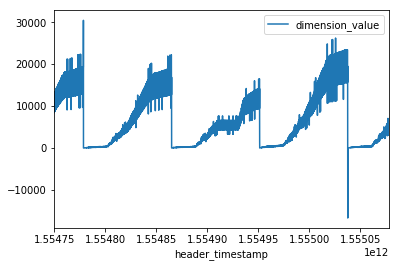

In [45]:
%matplotlib inline

df = portiaApi.device(device).port(port).sensor(sensor).select(params=params)
df.plot(x='header_timestamp', y='dimension_value')

In [46]:
portiaApi.device(device).port(port).sensor(sensor).select(last=True, params=params)

,header_timestamp,dimension_value,dimension_code,dimension_unity_code,dimension_thing_code,Unnamed: 5
0,1555077892690,5129,8,7,22,NaN


In [47]:
# Com humanização
portiaApi.device(device).port(port).sensor(sensor).dimensions(last=True, params=params).humanize()

,header_timestamp,dimension_value,dimension,dimension_unity,dimension_thing
0,1555077892690,5129,Fluxo Pontual,L/min,SondaSmaaiH2O


In [48]:
# Com humanização de timestamp
portiaApi.device(device).port(port).sensor(sensor).dimensions(last=True, params=params).humanize(datetime=True)

,header_datetime,dimension_value,dimension,dimension_unity,dimension_thing
0,a month ago,5129,Fluxo Pontual,L/min,SondaSmaaiH2O


#### Pacotes por Porta e Código de Dimensão

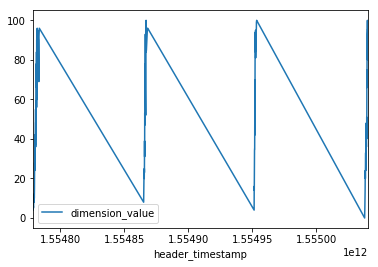

In [49]:
%matplotlib inline

df = portiaApi.device(device).port(port).dimension(dimension).select(params=params)
df.plot(x='header_timestamp', y='dimension_value')

In [50]:
portiaApi.device(device).port(port).dimension(dimension).select(last=True, params=params)

,header_timestamp,dimension_value,dimension_code,dimension_unity_code,dimension_thing_code,Unnamed: 5
0,1555040295116,88,8,7,22,NaN


In [51]:
# Com humanização
portiaApi.device(device).port(port).dimension(dimension).select(last=True, params=params).humanize()

,header_timestamp,dimension_value,dimension,dimension_unity,dimension_thing,Unnamed: 5
0,1555040295116,88,Fluxo Pontual,L/min,SondaSmaaiH2O,NaN


In [52]:
# Com humanização de timestamp
portiaApi.device(device).port(port).dimension(dimension).select(last=True, params=params).humanize(datetime=True)

,header_datetime,dimension_value,dimension,dimension_unity,dimension_thing,Unnamed: 5
0,a month ago,88,Fluxo Pontual,L/min,SondaSmaaiH2O,NaN


#### Pacotes por Porta, Sensor e Código de Dimensão

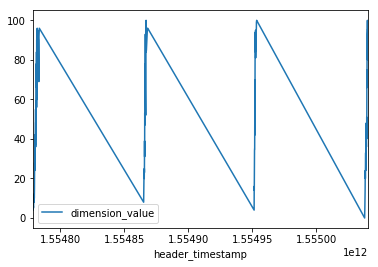

In [53]:
%matplotlib inline

df = portiaApi.device(device).port(port).sensor(sensor).dimension(dimension).select(params=params)
df.plot(x='header_timestamp', y='dimension_value')

In [54]:
portiaApi.device(device).port(port).sensor(sensor).dimension(dimension).select(last=True, params=params)

,header_timestamp,dimension_value,dimension_code,dimension_unity_code,dimension_thing_code,Unnamed: 5
0,1555040295116,88,8,7,22,NaN


In [55]:
# Com humanização
portiaApi.device(device).port(port).sensor(sensor).dimension(dimension).select(last=True, params=params).humanize()

,header_timestamp,dimension_value,dimension,dimension_unity,dimension_thing,Unnamed: 5
0,1555040295116,88,Fluxo Pontual,L/min,SondaSmaaiH2O,NaN


In [56]:
# Com humanização de timestamp
portiaApi.device(device).port(port).sensor(sensor).dimension(dimension).select(last=True, params=params).humanize(datetime=True)

,header_datetime,dimension_value,dimension,dimension_unity,dimension_thing,Unnamed: 5
0,a month ago,88,Fluxo Pontual,L/min,SondaSmaaiH2O,NaN


### 3.4. Summary
* Funções para obtenção de sumários de um dispositivo;

#### Parâmetros Possíveis (Todos Opcionais)

In [57]:
from portiapy.summary import SummaryStrategies

strategy = SummaryStrategies.PER_HOUR

interval = 1

params = {
    'from': None,
    'to': None,
    'order': None,
    'precision': 'ms',
    'min': True,
    'max': True,
    'sum': True,
    'avg': True,
    'median': False,
    'mode': False,
    'stddev': False,
    'spread': False
}

#### Sumário por Porta e Sensor

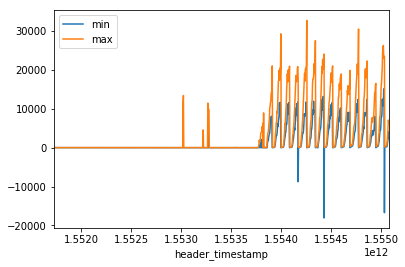

In [58]:
%matplotlib inline

df = portiaApi.device(device).port(port).sensor(sensor).summary(strategy=strategy, interval=interval, params=params)
ax = df.plot(x='header_timestamp', y='min')
ax = df.plot(ax=ax, x='header_timestamp', y='max')

#### Sumário por Porta, Sensor e Código de Dimensão

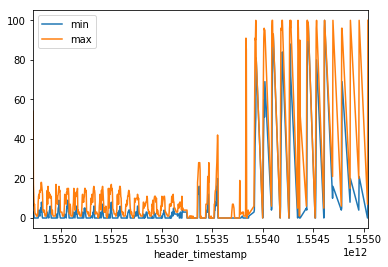

In [59]:
%matplotlib inline

df = portiaApi.device(device).port(port).sensor(sensor).dimension(dimension).summary(strategy=strategy, interval=interval, params=params)
ax = df.plot(x='header_timestamp', y='min')
ax = df.plot(ax=ax, x='header_timestamp', y='max')

## 4. Implicação do Uso de Especificações nas Consultas
* Por padrão toda consulta utiliza a **especificação** padrão (_default_);
* É possível que nos exemplos apresentados dois gráficos da mesma série temporal possam ter sido exibidos de maneira diferente dado a presença do código da dimensão na consulta;
* Isto ocorre devido a ação da **especificação** que determinou por qual pipeline (**axioma** + **fases**) a série temporal será tratada e quais valores serão utilizados neste tratamento;

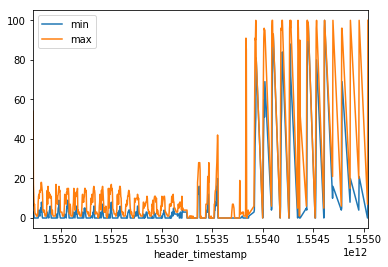

In [60]:
# Exemplo com a especificação default
%matplotlib inline

df = portiaApi.device(device).port(port).sensor(sensor).dimension(dimension).summary(strategy=strategy, interval=interval, params=params)
ax = df.plot(x='header_timestamp', y='min')
ax = df.plot(ax=ax, x='header_timestamp', y='max')

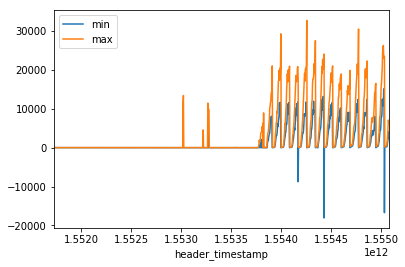

In [61]:
# Exemplo com a especificação raw
params['specification'] = 'raw'
%matplotlib inline

df = portiaApi.device(device).port(port).sensor(sensor).dimension(dimension).summary(strategy=strategy, interval=interval, params=params)
ax = df.plot(x='header_timestamp', y='min')
ax = df.plot(ax=ax, x='header_timestamp', y='max')